In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns = iris.feature_names )
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_scaled_data = pca.fit_transform(scaled_data)
new_scaled_data = pd.DataFrame(new_scaled_data )
new_scaled_data

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


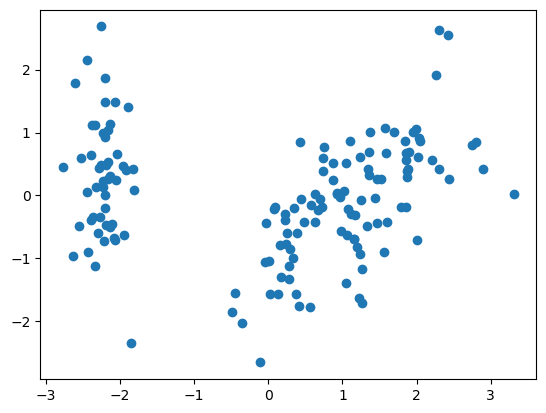

In [19]:
plt.scatter(new_scaled_data[0], new_scaled_data[1])

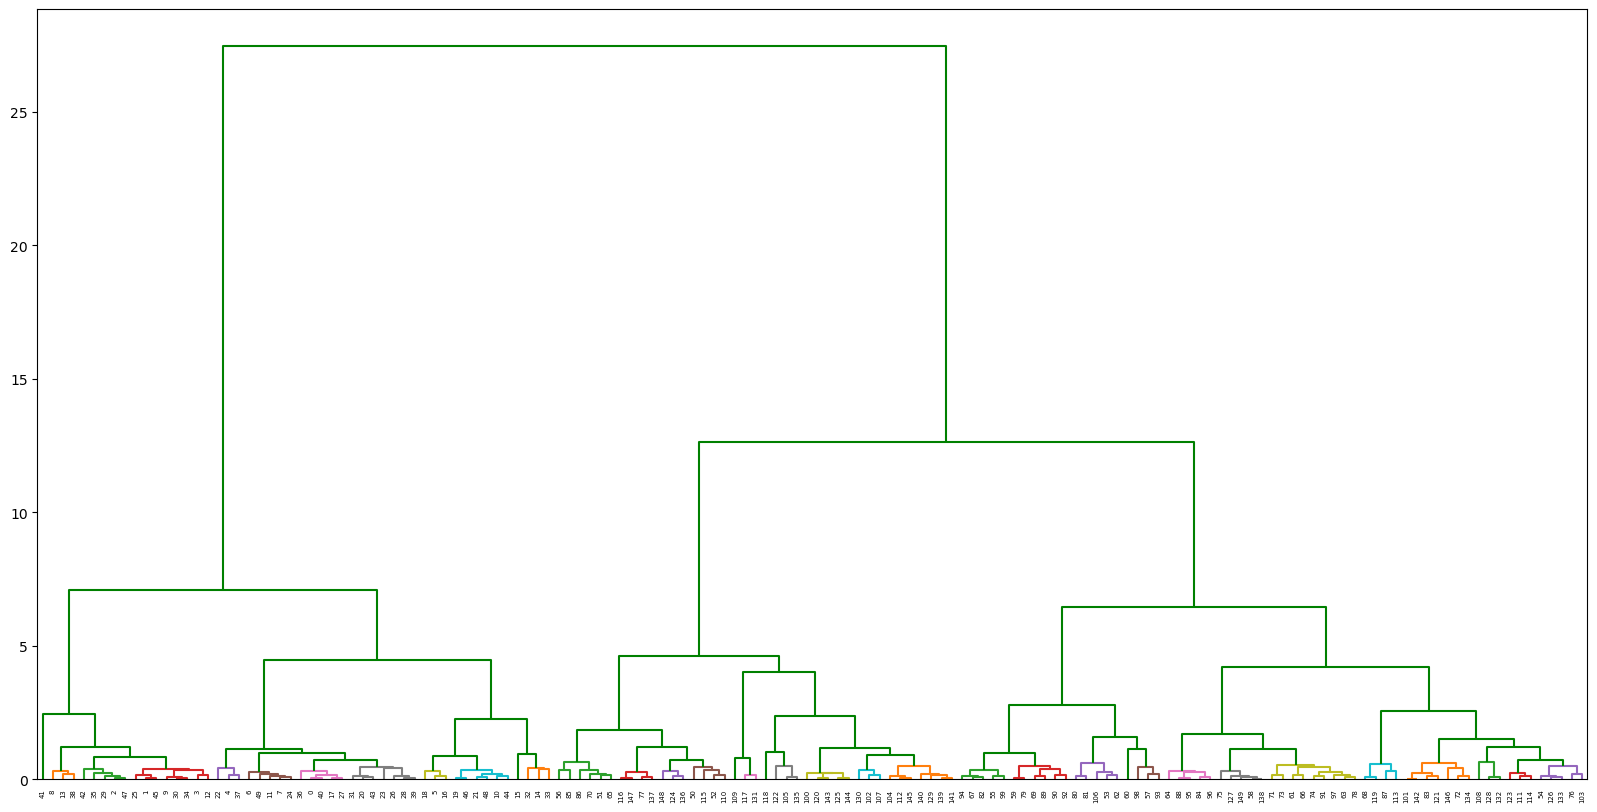

In [24]:
from scipy.cluster import hierarchy
plt.figure(figsize = (20,10))
dn = hierarchy.dendrogram(
    hierarchy.linkage(new_scaled_data, method = "ward"), above_threshold_color="green", color_threshold=.7)


In [25]:
from sklearn.cluster import AgglomerativeClustering 
clustering = AgglomerativeClustering(n_clusters=2).fit(new_scaled_data) 
  
# print the class labels 
print(clustering.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


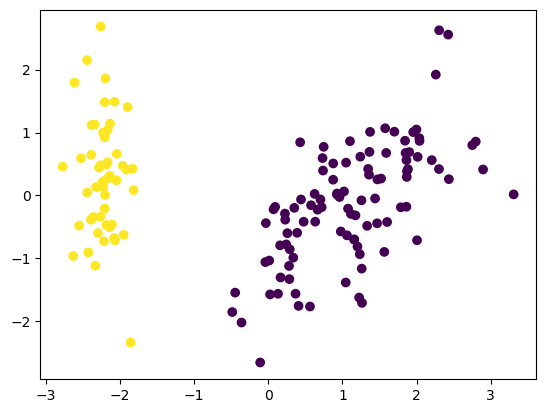

In [26]:
plt.scatter(new_scaled_data[0], new_scaled_data[1], c = clustering.labels_)

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(new_scaled_data, clustering.labels_)

0.614520203623045